In [ ]:
# install the necessary libraries
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 82.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
# Import the ultralytics library, which provides the core functionality for YOLO object detection.
import ultralytics
# Import the Roboflow class from the roboflow library for interacting with Roboflow datasets.
from roboflow import Roboflow

# Import the YOLO class from ultralytics, representing a YOLO object detection model.
from ultralytics import YOLO

# Import display and Image for visualizing data and images within the Jupyter Notebook.
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Data downdloading and preparation for the training
in general, this code snippet sets up access to a specific project on roboflow dedicated to continuous fire detection. it downloads the necessary dataset, preparing the environment for training a yolov8 object detection model to identify continuous fire in images or videos.

In [ ]:
# creating a roboflow object using the api key for authentication.
rf = Roboflow(api_key="8ZDuTjlAim5qzKYYnbUj")

# accessing the specific project on roboflow.
# the workspace id "-jwzpw" and project name "continuous_fire" are used to locate the project.
project = rf.workspace("-jwzpw").project("continuous_fire")

# selecting the version of the project to use. here, it's version 6.
version = project.version(6)

# downloading the dataset in a format compatible with yolov8.
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# creating a network
# task is for detecting while the mode setted as train
# I just use the version8 small model for the sake of simplcity it is possible to use nano model, large model etc
# epoch = 1 means i will train it only once because training a model will take a lot of time if our epoch is quite large and since colab gives limited gpu

!yolo task=detect mode=train model=yolov8s.pt data=/content/continuous_fire-6/data.yaml epochs=1 imgsz=640 plots=True


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/continuous_fire-6/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

## visual representation of the performance of the model
The CF displays the confusion matrix generated during the training of the yolov8 model.

- image: this is a function from the IPython.display module, used to display images within the jupyter notebook.
- filename: this argument specifies the path to the image file, in this case, the confusion matrix saved during training. it's located at /content/runs/detect/train4/confusion_matrix.png.
- width: this argument sets the width of the displayed image to 600 pixels.
the confusion matrix is a visual representation of the performance of a classification model. it shows the number of correct and incorrect predictions made by the model for each class, helping to understand where the model might be making mistakes.

in this case, the confusion matrix will show how well the yolov8 model performed in identifying continuous fire during training.

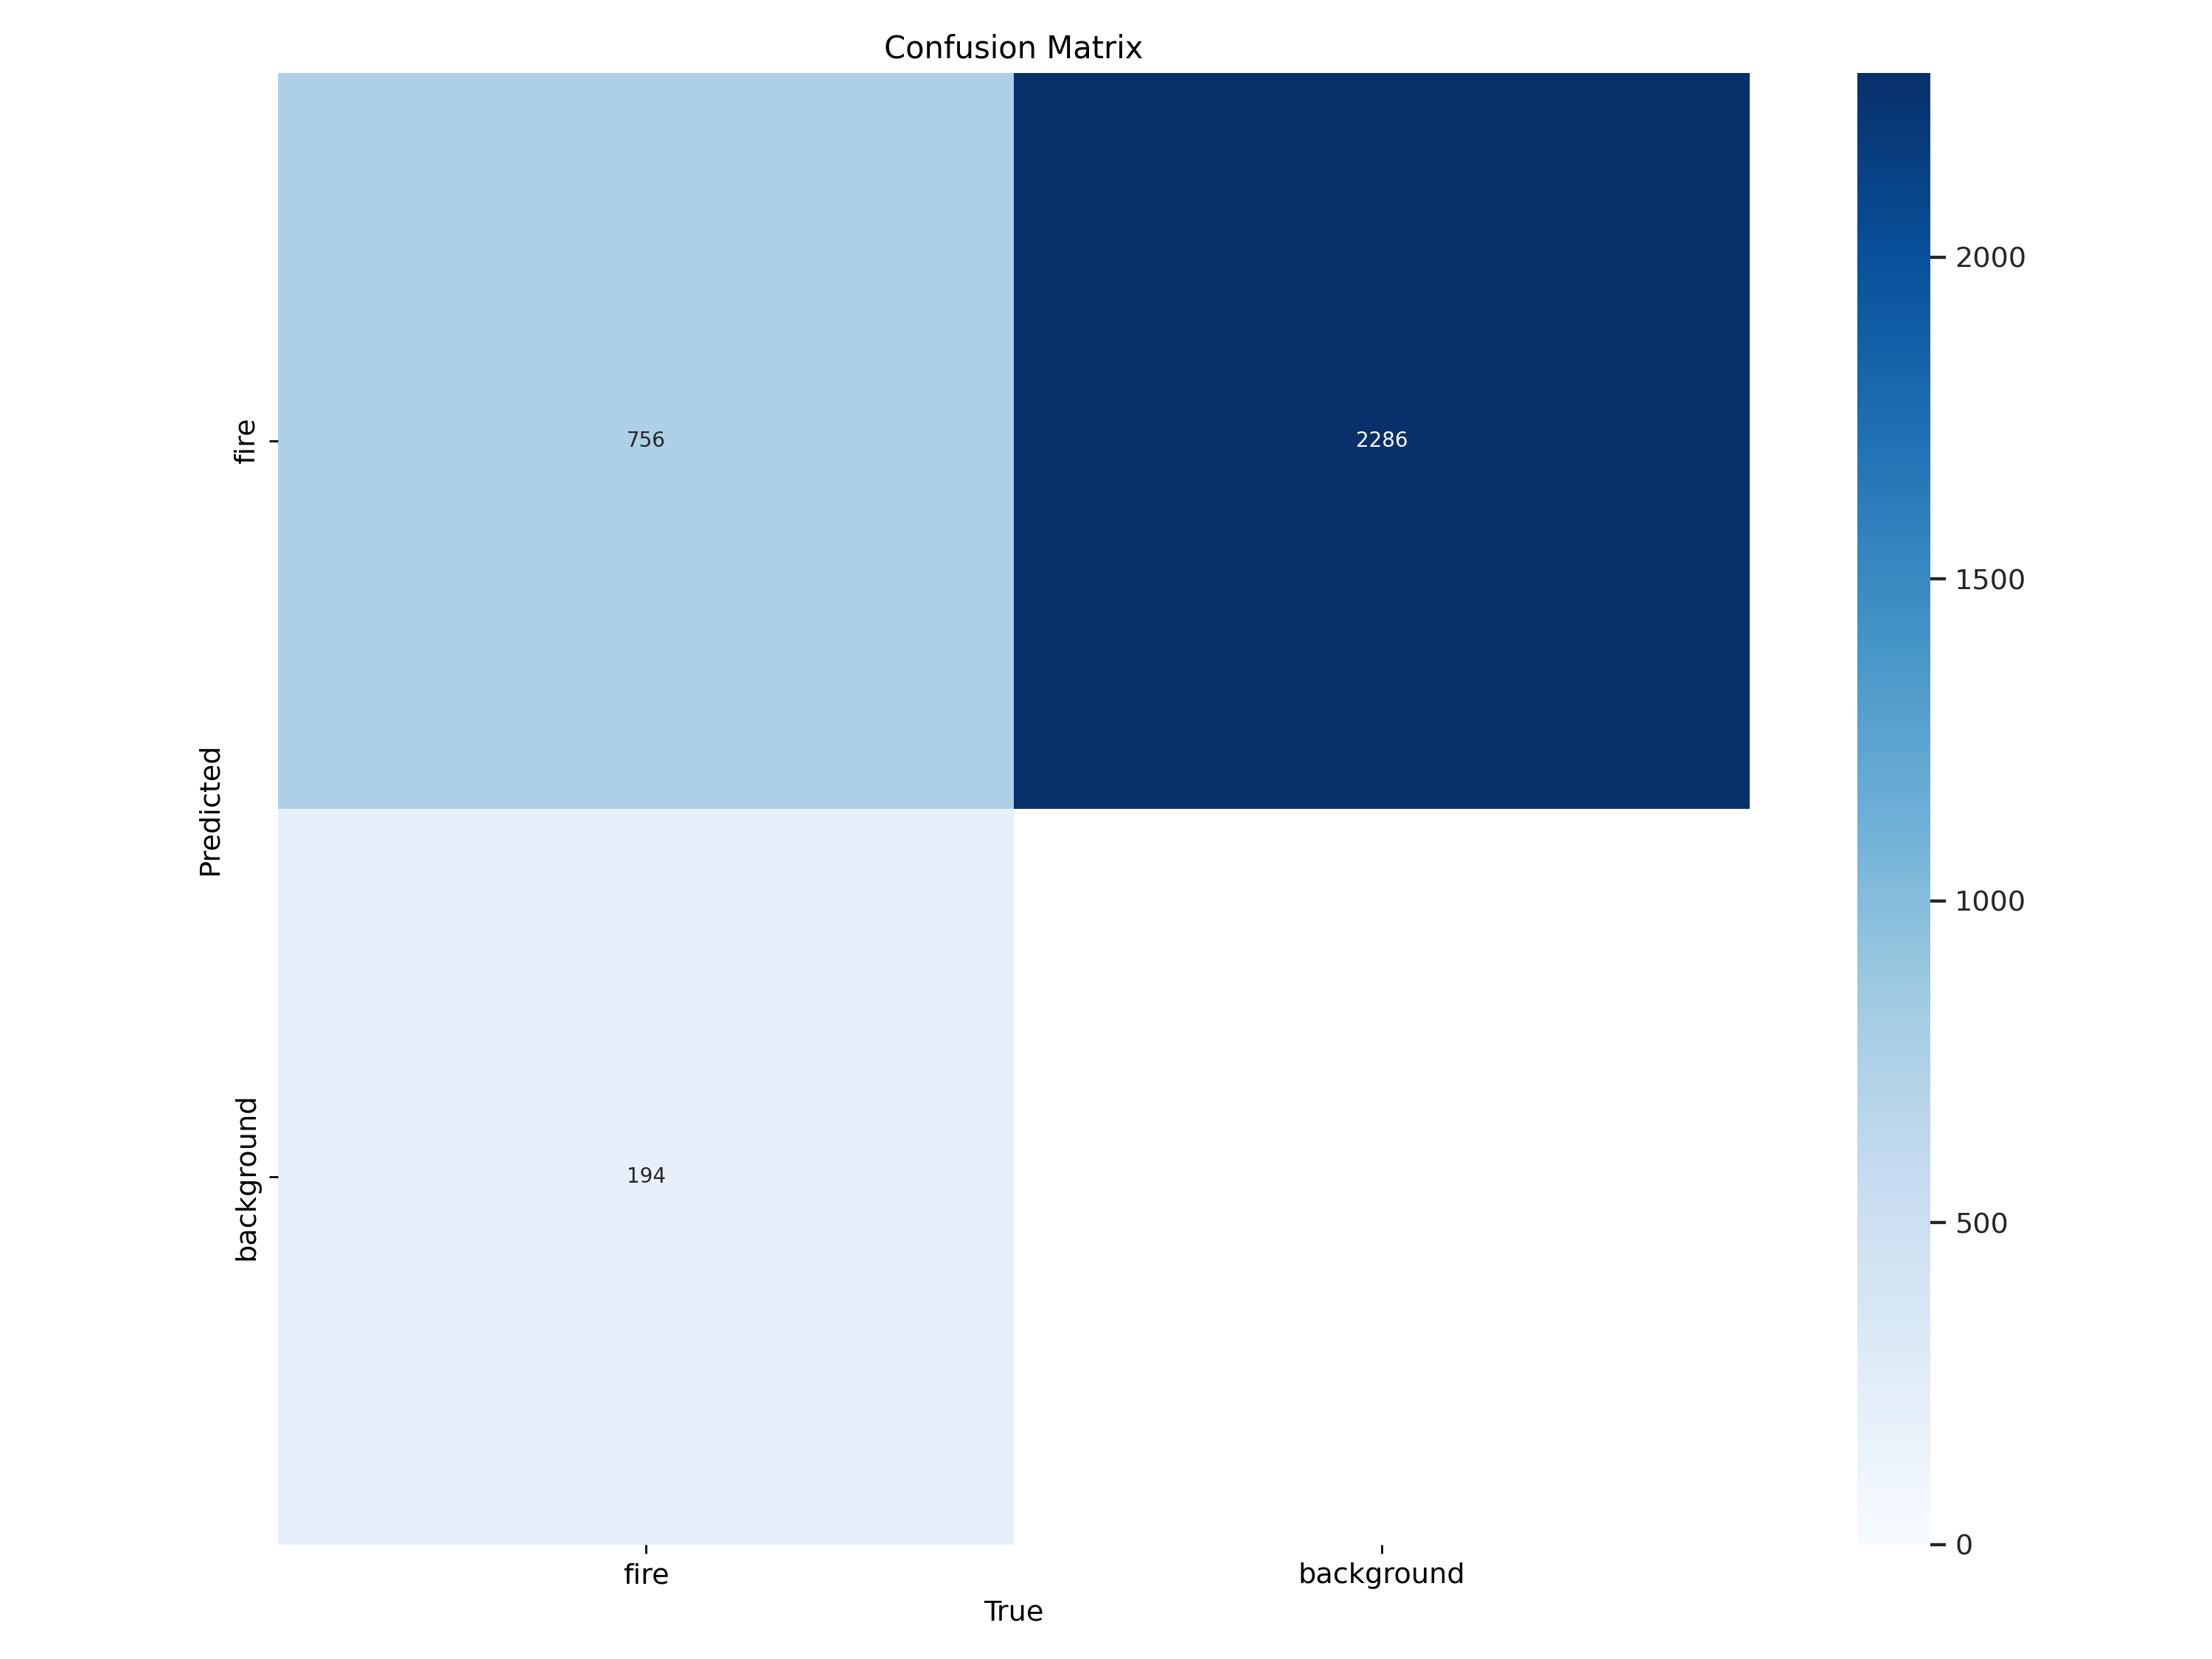

In [ ]:
# let's see the results of those training plots that is the confusion matrix
Image(filename='/content/runs/detect/train4/confusion_matrix.png', width=600)


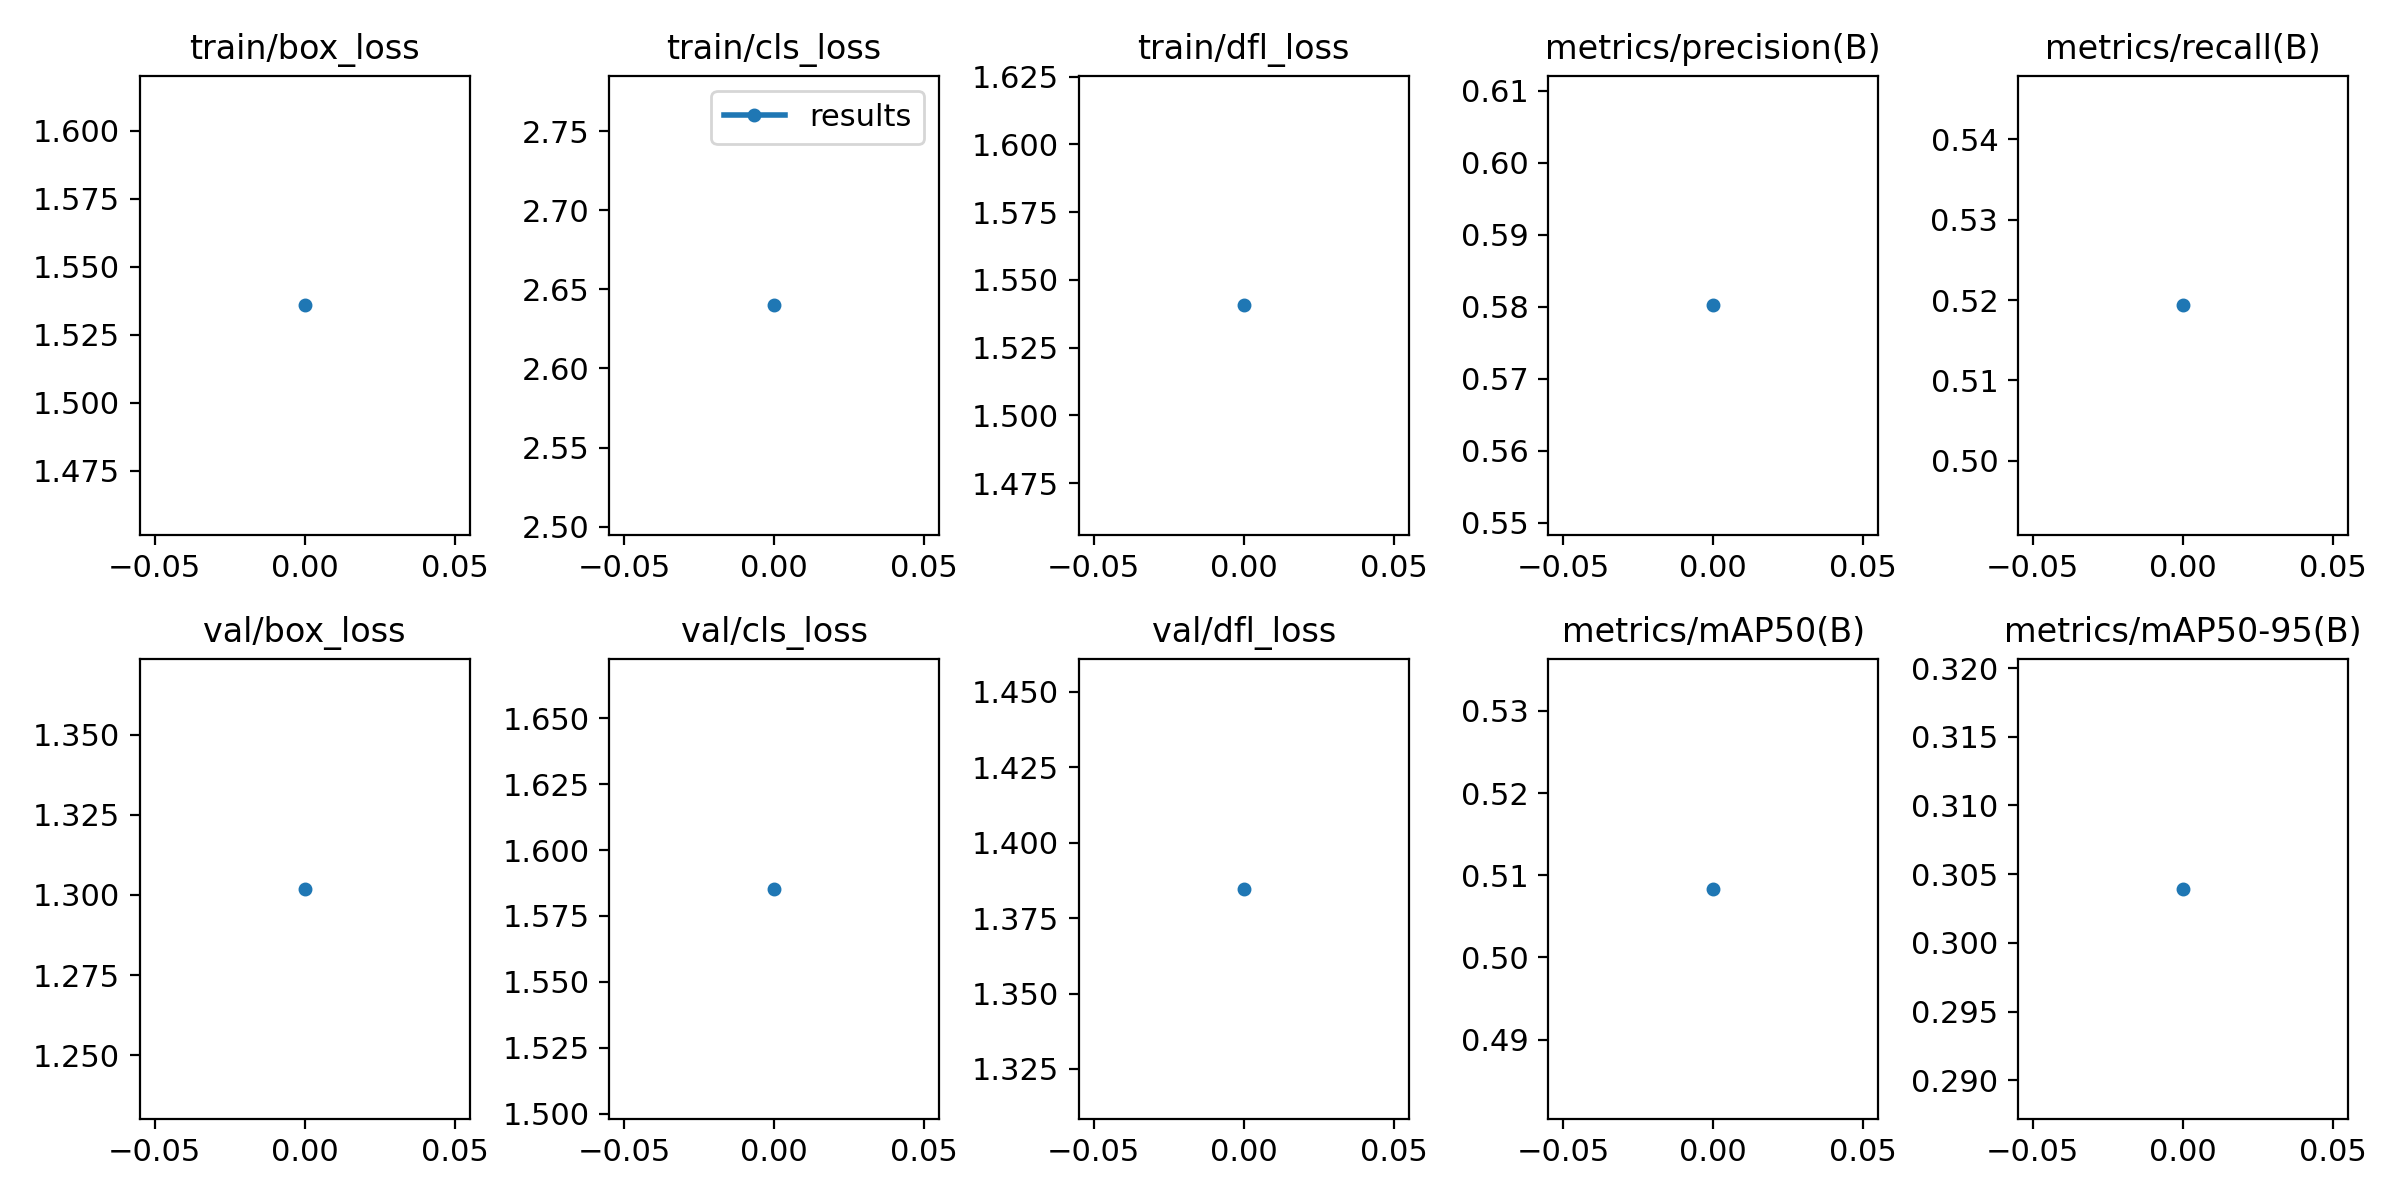

## Model validation
This below initiates the validation process for the trained yolov8 model. let's explain each part:

- `!yolo`: this is a command to run the yolo command-line tool.
- `task=detect`: this specifies that the task is object detection.
- `mode=val`: this sets the mode to validation, indicating that the model will be evaluated on a validation dataset.
- `model=/content/runs/detect/train4/weights/best.pt`: this specifies the path to the trained model weights. best.pt usually refers to the weights that achieved the best performance during training.
- `data=/content/continuous_fire-6/data.yaml`: this indicates the path to the data configuration file (data.yaml) which contains information about the dataset used for validation.
- `imgsz=640`: this sets the input image size to 640 pixels.
- `plots=True`: this enables the generation of validation plots, including metrics and visualizations.
in essence, this code executes the yolo tool to validate the trained model on a specified dataset. it uses the best performing weights from training and generates plots to visualize the model's performance on the validation data.

In [ ]:
# Now, we are going to check validation for our model
!yolo task=detect mode=val model=/content/runs/detect/train4/weights/best.pt data=/content/continuous_fire-6/data.yaml imgsz=640 plots=True

Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/continuous_fire-6/valid/labels.cache... 754 images, 2 backgrounds, 0 corrupt: 100% 754/754 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 48/48 [12:05<00:00, 15.11s/it]
                   all        754        950      0.384      0.544      0.369      0.177
Speed: 9.3ms preprocess, 943.2ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


# Huge Thanks to [CodeAlpha](https://codealpha.tech)! 🎉

I just wanted to take a moment to express my **heartfelt gratitude** to **[CodeAlpha](https://codealpha.tech)** for providing me with an incredible internship opportunity in the feilf of `AI/ML/DL`! 🙌✨

This experience has been nothing short of amazing, and I have learned so much! 📚💡
Thank you for believing in me and giving me the chance to grow both personally and professionally. 🌱💪

I’m truly grateful for this opportunity! Here’s to more learning and growth ahead! 🚀🌟

**Thank you, [CodeAlpha](https://codealpha.tech)!** 💖🙌🎉